03_eda_visualization.ipynb

Supply Chain EDA & Visual Insights
The Question should cover typical Questions from Manager, Directors or Persons which are working with the results in a business enviroment. To formulate the Questions I also asked ChatGPT for real life use cases or Questions from the mentioned Persons.

Goal: Answer relevant business questions using visual analysis

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load cleaned data
df = pd.read_csv("C:/Users/User/OneDrive/DS/Projekte/SCM Analysis/data/cleaned/supply_chain_data_cleaned.csv")

# Set default plot style
sns.set(style="whitegrid")

### 1. Which product types generate the highest revenue?

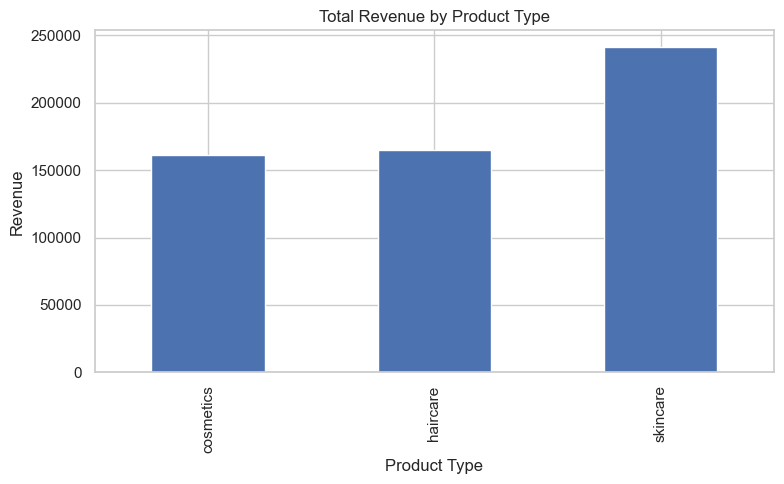

In [64]:
plt.figure(figsize=(8, 5))
df.groupby("Product type")["Revenue generated"].sum().plot(kind="bar")
plt.title("Total Revenue by Product Type")
plt.ylabel("Revenue")
plt.xlabel("Product Type")
plt.tight_layout()
plt.show()

The So What:

Some product types (skincare) generate much more revenue than others.

→ Focus inventory investment on top-performing categories.

### 2. Are there products with high availability but low sales?

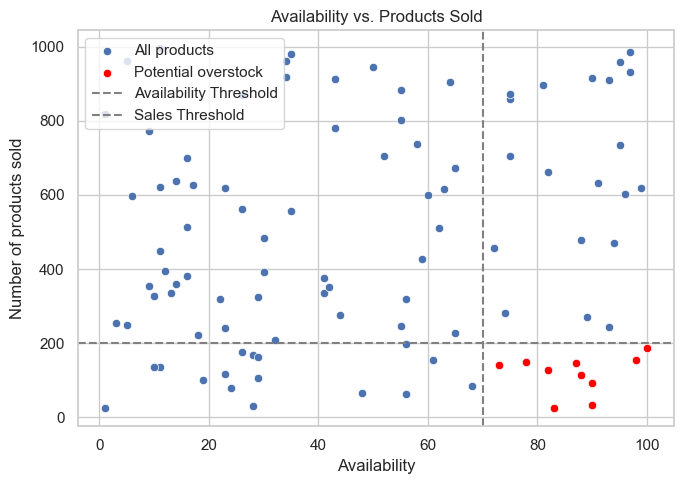

Products with high availability but low sales:


,SKU,Product type,Availability,Number of products sold
4,SKU5,haircare,87,147
7,SKU8,cosmetics,78,150
16,SKU17,cosmetics,82,126
18,SKU19,skincare,100,187
24,SKU25,haircare,73,142
41,SKU42,skincare,98,155
55,SKU56,skincare,90,93
69,SKU70,haircare,90,32
84,SKU85,cosmetics,83,25
92,SKU93,haircare,88,114


In [65]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Availability", y="Number of products sold", label="All products")

# Highlight overstocked points in red
sns.scatterplot(data=overstocked, x="Availability", y="Number of products sold", color="red", label="Potential overstock")

# Add threshold lines
plt.axvline(high_availability, color="grey", linestyle="--", label="Availability Threshold")
plt.axhline(low_sales, color="grey", linestyle="--", label="Sales Threshold")

plt.title("Availability vs. Products Sold")
plt.legend()
plt.tight_layout()
plt.show()


# Define thresholds for potential overstocked items 
# The threshold are just random numbers (in real life aligned with Managers, Team, etc.)
high_availability = 70
low_sales = 200

# Filter rows matching the condition
overstocked = df[(df["Availability"] > high_availability) & (df["Number of products sold"] < low_sales)]

# Show the relevant rows
print("Products with high availability but low sales:")
display(overstocked[["SKU", "Product type", "Availability", "Number of products sold"]])


The so what:

Some products have high availability but low sales, possible overstock.

→ Investigate why they're not selling (wrong pricing? weak demand?) and adjust stock or pricing strategy.

### 3. Which carriers have the highest shipping costs?

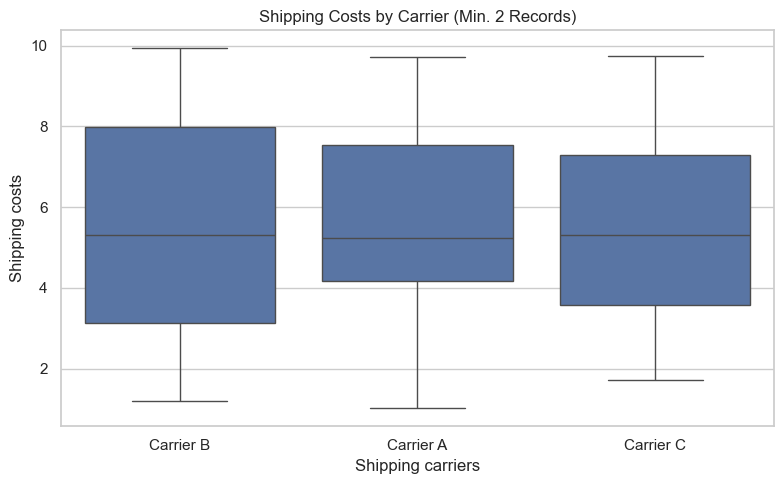

In [66]:
# Note: DHL will be excluded cause the supplier only appears once
carrier_counts = df['Shipping carriers'].value_counts()

valid_carriers = carrier_counts[carrier_counts > 1].index
df_filtered = df[df['Shipping carriers'].isin(valid_carriers)]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='Shipping carriers', y='Shipping costs')
plt.title("Shipping Costs by Carrier (Min. 2 Records)")
plt.tight_layout()
plt.show()


The boxplot shows how shipping costs vary between different carriers. Some carriers have a much higher median cost compared to others, and a few also show a wide range of costs or clear outliers. This suggests that certain carriers may be consistently more expensive or have unstable pricing.

So what?

→ If a carrier shows both high average costs and large variation, it may indicate inefficiency or a lack of pricing control.

→ The business could consider switching to carriers with lower and more stable shipping costs, or renegotiate contracts with the most expensive ones.

→ For cost-sensitive products, selecting carriers with tighter cost ranges can help improve profitability and predictability in the supply chain.

### 4. How do defect rates vary by supplier?

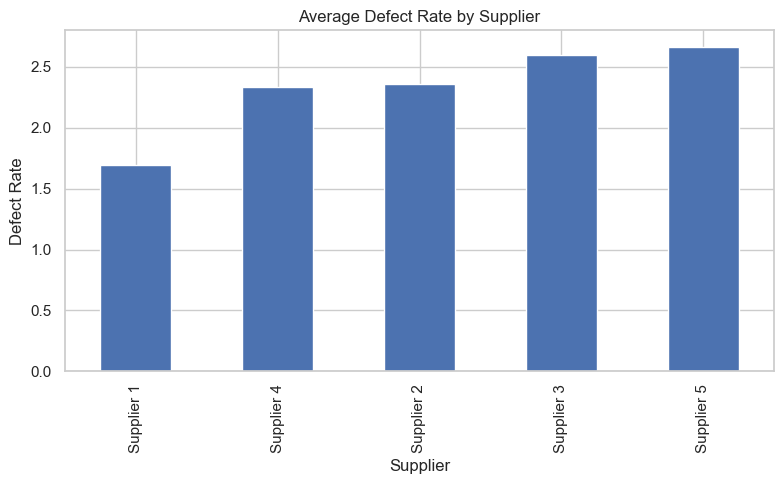

In [67]:
plt.figure(figsize=(8, 5))
df.groupby("Supplier name")["Defect rates"].mean().sort_values().plot(kind="bar")
plt.title("Average Defect Rate by Supplier")
plt.ylabel("Defect Rate")
plt.xlabel("Supplier")
plt.tight_layout()
plt.show()

The so what:

Some suppliers show significantly higher defect rates.

→ Quality control or supplier switching might reduce returns and costs.

### 5. Which transportation modes are fastest or slowest?

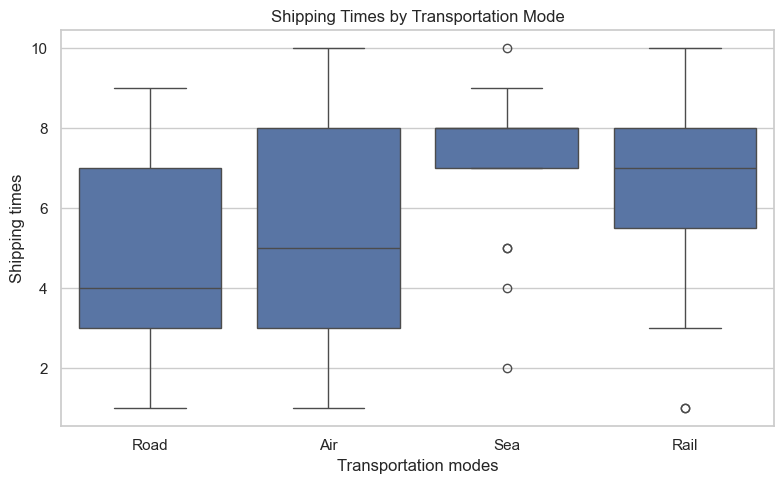

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Transportation modes", y="Shipping times")
plt.title("Shipping Times by Transportation Mode")
plt.tight_layout()
plt.show()

Air is fastest but might be more expensive. Rail or road takes longer.

→ Match transport mode to product priority (e.g. express for top-sellers only).

### 6. Which regions have the highest overall costs?

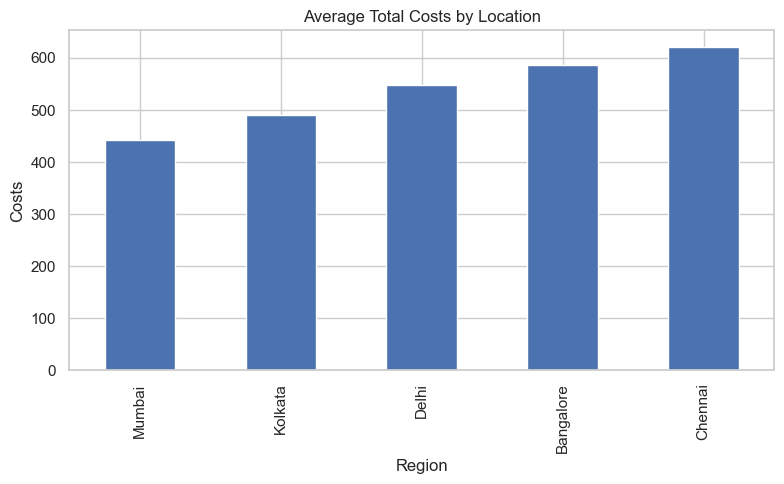

In [69]:
plt.figure(figsize=(8, 5))
df.groupby("Location")["Costs"].mean().sort_values().plot(kind="bar")
plt.title("Average Total Costs by Location")
plt.ylabel("Costs")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

The so what:

Certain regions (Chennai or Banglore) show higher costs.

→ Investigate local cost drivers – possibly inefficient suppliers or expensive transport routes.

### 7. Optional: Correlation heatmap between numeric features

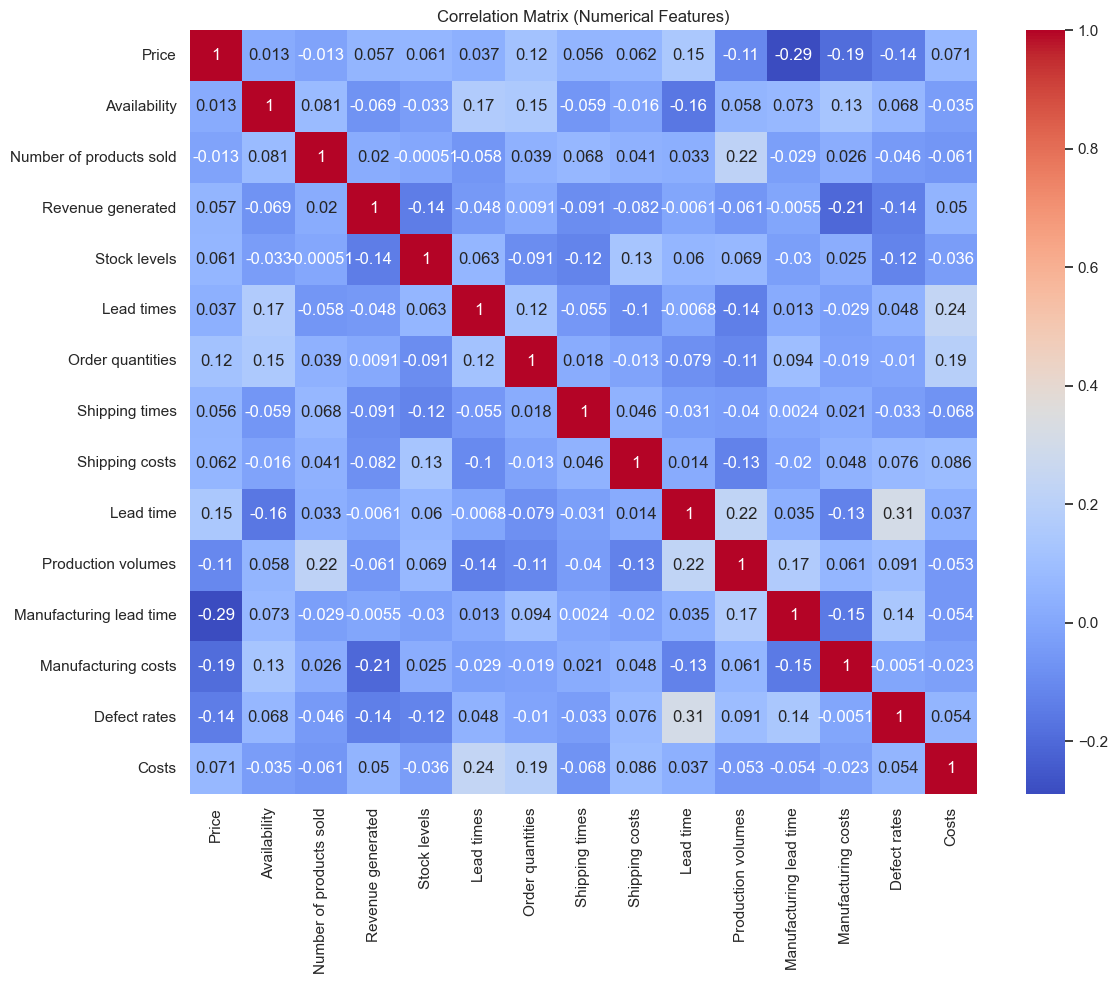

In [70]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()

The so what:

Strong correlations confirm data quality.

Weak or no correlation might challenge assumptions.

→ Use these relationships for modeling or further analysis.